In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
df = pd.read_csv('C:/Users/Administrator/Desktop/pythonHistoricalTesting/data/SCData/YMH21-CBOT.1min_data_30days.txt',parse_dates = {'Time' : [0,1]})
df.columns = ['Time','Open','High','Low','Close','Volume','NumberOfTrades','BidVolume','AskVolume']
df.head()

,Time,Open,High,Low,Close,Volume,NumberOfTrades,BidVolume,AskVolume
0,2020-12-20 17:00:00,30300,30333,30272,30272,751,572,416,335
1,2020-12-20 17:01:00,30273,30285,30265,30267,307,259,141,166
2,2020-12-20 17:02:00,30267,30267,30234,30241,257,230,144,113
3,2020-12-20 17:03:00,30242,30242,30182,30196,477,388,233,244
4,2020-12-20 17:04:00,30196,30204,30178,30186,237,196,141,96


In [73]:
df.head(50)

,Time,Open,High,Low,Close,Volume,NumberOfTrades,BidVolume,AskVolume,min5Tag,min15Tag,min60Tag
0,2020-12-20 17:00:00,30300,30333,30272,30272,751,572,416,335,2020-12-20 17:00:00,2020-12-20 17:00:00,2020-12-20 17:00:00
1,2020-12-20 17:01:00,30273,30285,30265,30267,307,259,141,166,2020-12-20 17:05:00,2020-12-20 17:15:00,2020-12-20 18:00:00
2,2020-12-20 17:02:00,30267,30267,30234,30241,257,230,144,113,2020-12-20 17:05:00,2020-12-20 17:15:00,2020-12-20 18:00:00
3,2020-12-20 17:03:00,30242,30242,30182,30196,477,388,233,244,2020-12-20 17:05:00,2020-12-20 17:15:00,2020-12-20 18:00:00
4,2020-12-20 17:04:00,30196,30204,30178,30186,237,196,141,96,2020-12-20 17:05:00,2020-12-20 17:15:00,2020-12-20 18:00:00
5,2020-12-20 17:05:00,30186,30211,30184,30207,149,125,56,93,2020-12-20 17:05:00,2020-12-20 17:15:00,2020-12-20 18:00:00
6,2020-12-20 17:06:00,30210,30218,30202,30217,133,95,66,67,2020-12-20 17:10:00,2020-12-20 17:15:00,2020-12-20 18:00:00
7,2020-12-20 17:07:00,30217,30219,30203,30210,78,67,43,35,2020-12-20 17:10:00,2020-12-20 17:15:00,2020-12-20 18:00:00
8,2020-12-20 17:08:00,30210,30217,30205,30211,75,69,42,33,2020-12-20 17:10:00,2020-12-20 17:15:00,2020-12-20 18:00:00
9,2020-12-20 17:09:00,30208,30214,30193,30194,133,112,72,61,2020-12-20 17:10:00,2020-12-20 17:15:00,2020-12-20 18:00:00


In [41]:
type(df.Time[0])

pandas._libs.tslibs.timestamps.Timestamp

## 合成5min

In [3]:
#要先把一天的时间切片成8:00-17:00为一段
df['min5Tag'] = None
for i in range(len(df)): 
    #需要事先判断是属于8:00-17:00
    min_5 = pd.date_range(start = '2020-12-20 17:00:00', end = '2021-01-19 00:00:00', freq='5min')
    temp = min_5 - df.Time.iloc[i]    
    df.min5Tag[i] = min_5[(temp >= '0 days 00:00:00') & (temp < '0 days 00:05:00')][0]

<ipython-input-3-eb2213acd9ca>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.min5Tag[i] = min_5[(temp >= '0 days 00:00:00') & (temp < '0 days 00:05:00')][0]


In [4]:
table_5min = pd.pivot_table(df[df.Time >= pd.to_datetime('2020-12-21')],values = ['High','Low','Volume','NumberOfTrades','BidVolume','AskVolume'],index = ['min5Tag'],aggfunc = {'High': np.max,'Low':np.min,'Volume':np.sum,'NumberOfTrades':np.sum,'BidVolume':np.sum,'AskVolume':np.sum})

In [5]:
Open = []
Close = []
for i in range(len(table_5min)):
    time = table_5min.index[i]
    #print(date)

    Idx = df[df.min5Tag == time].index.tolist()
    if len(Idx) >= 1:
        OpenIdx = Idx[0]
        CloseIdx = Idx[-1]
        Open_sub = df.loc[OpenIdx].Open
        Close_sub = df.loc[CloseIdx].Close
        Open.append(Open_sub)
        Close.append(Close_sub)

    else:
        Open.append(0)
        Close.append(0)

In [6]:
table_5min['Open'] = Open
table_5min['Close'] = Close

In [7]:
table_5min.head()

,AskVolume,BidVolume,High,Low,NumberOfTrades,Volume,Open,Close
min5Tag,,,,,,,,
2020-12-21 00:00:00,43,55,30187,30174,85,98,30182,30175
2020-12-21 00:05:00,102,155,30175,30165,221,257,30175,30171
2020-12-21 00:10:00,77,152,30176,30161,205,229,30171,30165
2020-12-21 00:15:00,159,120,30164,30146,244,279,30163,30160
2020-12-21 00:20:00,59,95,30164,30157,137,154,30159,30161


## 合成15min数据

In [8]:
#要先把一天的时间切片成8:00-17:00为一段
df['min15Tag'] = None
for i in range(len(df)): 
    #需要事先判断是属于8:00-17:00
    min_15 = pd.date_range(start = '2020-12-20 17:00:00', end = '2021-01-19 00:00:00', freq='15min')
    temp = min_15 - df.Time.iloc[i]    
    df.min15Tag[i] = min_15[(temp >= '0 days 00:00:00') & (temp < '0 days 00:15:00')][0]

<ipython-input-8-203c1eccadc6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.min15Tag[i] = min_15[(temp >= '0 days 00:00:00') & (temp < '0 days 00:15:00')][0]


In [9]:
table_15min = pd.pivot_table(df[df.Time >= pd.to_datetime('2020-12-21')],values = ['High','Low','Volume','NumberOfTrades','BidVolume','AskVolume'],index = ['min15Tag'],aggfunc = {'High': np.max,'Low':np.min,'Volume':np.sum,'NumberOfTrades':np.sum,'BidVolume':np.sum,'AskVolume':np.sum})

In [10]:
Open = []
Close = []
for i in range(len(table_15min)):
    time = table_15min.index[i]
    #print(date)

    Idx = df[df.min15Tag == time].index.tolist()
    if len(Idx) >= 1:
        OpenIdx = Idx[0]
        CloseIdx = Idx[-1]
        Open_sub = df.loc[OpenIdx].Open
        Close_sub = df.loc[CloseIdx].Close
        Open.append(Open_sub)
        Close.append(Close_sub)

    else:
        Open.append(0)
        Close.append(0)

In [11]:
table_15min['Open'] = Open
table_15min['Close'] = Close

In [12]:
table_15min.head()

,AskVolume,BidVolume,High,Low,NumberOfTrades,Volume,Open,Close
min15Tag,,,,,,,,
2020-12-21 00:00:00,43,55,30187,30174,85,98,30164,30175
2020-12-21 00:15:00,338,427,30176,30146,670,765,30175,30160
2020-12-21 00:30:00,204,232,30165,30149,376,436,30159,30163
2020-12-21 00:45:00,203,228,30168,30130,391,431,30164,30135
2020-12-21 01:00:00,302,230,30154,30110,491,532,30135,30135


In [66]:
pd.PeriodIndex(table_15min.index, freq="s")

PeriodIndex(['2020-12-21 00:00:00', '2020-12-21 00:15:00',
             '2020-12-21 00:30:00', '2020-12-21 00:45:00',
             '2020-12-21 01:00:00', '2020-12-21 01:15:00',
             '2020-12-21 01:30:00', '2020-12-21 01:45:00',
             '2020-12-21 02:00:00', '2020-12-21 02:15:00',
             ...
             '2021-01-18 02:45:00', '2021-01-18 03:00:00',
             '2021-01-18 03:15:00', '2021-01-18 03:30:00',
             '2021-01-18 03:45:00', '2021-01-18 04:00:00',
             '2021-01-18 04:15:00', '2021-01-18 04:30:00',
             '2021-01-18 04:45:00', '2021-01-18 05:00:00'],
            dtype='period[S]', name='min15Tag', length=1680, freq='S')

In [68]:
pd.date_range(start="20210101", periods=10, freq="W-MON")

DatetimeIndex(['2021-01-04', '2021-01-11', '2021-01-18', '2021-01-25',
               '2021-02-01', '2021-02-08', '2021-02-15', '2021-02-22',
               '2021-03-01', '2021-03-08'],
              dtype='datetime64[ns]', freq='W-MON')

In [72]:
pd.Period("08:00:00", freq="4H")

Period('0001-01-01 08:00', '4H')

In [70]:
pd.Period("2020-11", freq="M")

Period('2020-11', 'M')

## 合成60min数据

In [13]:
#要先把一天的时间切片成8:00-17:00为一段
df['min60Tag'] = None
for i in range(len(df)): 
    #需要事先判断是属于8:00-17:00
    min_60 = pd.date_range(start = '2020-12-20 17:00:00', end = '2021-01-19 00:00:00', freq='60min')
    temp = min_60 - df.Time.iloc[i]    
    df.min60Tag[i] = min_60[(temp >= '0 days 00:00:00') & (temp < '0 days 00:60:00')][0]

<ipython-input-13-8535a5faa997>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.min60Tag[i] = min_60[(temp >= '0 days 00:00:00') & (temp < '0 days 00:60:00')][0]


In [14]:
table_60min = pd.pivot_table(df[df.Time >= pd.to_datetime('2020-12-21')],values = ['High','Low','Volume','NumberOfTrades','BidVolume','AskVolume'],index = ['min60Tag'],aggfunc = {'High': np.max,'Low':np.min,'Volume':np.sum,'NumberOfTrades':np.sum,'BidVolume':np.sum,'AskVolume':np.sum})

In [15]:
Open = []
Close = []
for i in range(len(table_60min)):
    time = table_60min.index[i]
    #print(date)

    Idx = df[df.min60Tag == time].index.tolist()
    if len(Idx) >= 1:
        OpenIdx = Idx[0]
        CloseIdx = Idx[-1]
        Open_sub = df.loc[OpenIdx].Open
        Close_sub = df.loc[CloseIdx].Close
        Open.append(Open_sub)
        Close.append(Close_sub)

    else:
        Open.append(0)
        Close.append(0)

In [16]:
table_60min['Open'] = Open
table_60min['Close'] = Close

In [17]:
table_60min.head()

,AskVolume,BidVolume,High,Low,NumberOfTrades,Volume,Open,Close
min60Tag,,,,,,,,
2020-12-21 00:00:00,43,55,30187,30174,85,98,30120,30175
2020-12-21 01:00:00,1047,1117,30176,30110,1928,2164,30175,30135
2020-12-21 02:00:00,2589,2870,30134,29965,4987,5459,30134,29984
2020-12-21 03:00:00,3094,3239,30060,29958,5778,6333,29982,30002
2020-12-21 04:00:00,4019,4635,30025,29784,7638,8654,30002,29796


# 加上早盘和夜盘的时间限制

In [44]:
#先根据不同的时间长度把一天的时间划分完毕
#5min
help(pd.date_range)

Help on function date_range in module pandas.core.indexes.datetimes:

date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize=False, name=None, closed=None, **kwargs) -> pandas.core.indexes.datetimes.DatetimeIndex
    Return a fixed frequency DatetimeIndex.
    
    Parameters
    ----------
    start : str or datetime-like, optional
        Left bound for generating dates.
    end : str or datetime-like, optional
        Right bound for generating dates.
    periods : int, optional
        Number of periods to generate.
    freq : str or DateOffset, default 'D'
        Frequency strings can have multiples, e.g. '5H'. See
        :ref:`here <timeseries.offset_aliases>` for a list of
        frequency aliases.
    tz : str or tzinfo, optional
        Time zone name for returning localized DatetimeIndex, for example
        'Asia/Hong_Kong'. By default, the resulting DatetimeIndex is
        timezone-naive.
    normalize : bool, default False
        Normalize start/

In [47]:
pd.date_range(start = '2020-12-20 08:00:00', freq='5min',periods = 109)

DatetimeIndex(['2020-12-20 08:00:00', '2020-12-20 08:05:00',
               '2020-12-20 08:10:00', '2020-12-20 08:15:00',
               '2020-12-20 08:20:00', '2020-12-20 08:25:00',
               '2020-12-20 08:30:00', '2020-12-20 08:35:00',
               '2020-12-20 08:40:00', '2020-12-20 08:45:00',
               ...
               '2020-12-20 16:15:00', '2020-12-20 16:20:00',
               '2020-12-20 16:25:00', '2020-12-20 16:30:00',
               '2020-12-20 16:35:00', '2020-12-20 16:40:00',
               '2020-12-20 16:45:00', '2020-12-20 16:50:00',
               '2020-12-20 16:55:00', '2020-12-20 17:00:00'],
              dtype='datetime64[ns]', length=109, freq='5T')

In [62]:
pd.date_range(start = '08:00:00', end = '17:00:00',freq='4H').values

array(['2021-01-19T08:00:00.000000000', '2021-01-19T12:00:00.000000000',
       '2021-01-19T16:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
.append(pd.to_datetime("2020-12-20 17:00:00"))

## Heikin-Ashi

In [18]:
df_to_array = np.array(table_5min.loc[:,['Open','High','Low','Close']])
HA_Close_no = np.mean(df_to_array, axis=1)#Set Close to Current Price for Last Bar为no的情况
HA_Close_yes = np.append(HA_Close_no[:-1],table_5min.Close[-1])

In [19]:
HA_Open = []
HA_Open_sub = table_5min.Open[0]
for i in range(len(HA_Close_no)):#这边也可以换成HA_Close_yes
    HA_Open.append(HA_Open_sub)
    HA_Open_sub = np.mean([HA_Open_sub ,HA_Close_no[i]])

In [20]:
HA_High = np.max(np.array([table_5min.High, HA_Open]),axis=0)
HA_Low = np.min(np.array([table_5min.Low, HA_Open]),axis=0)

In [42]:
HA_Open

[30182,
 30180.75,
 30176.125,
 30172.1875,
 30165.21875,
 30162.734375,
 30160.2421875,
 30158.87109375,
 30160.810546875,
 30159.6552734375,
 30152.32763671875,
 30147.788818359375,
 30146.769409179688,
 30140.134704589844,
 30123.692352294922,
 30101.34617614746,
 30092.54808807373,
 30087.774044036865,
 30080.137022018433,
 30069.318511009216,
 30049.284255504608,
 30022.767127752304,
 30012.258563876152,
 30003.504281938076,
 29999.002140969038,
 29997.12607048452,
 29986.81303524226,
 29983.53151762113,
 30004.515758810565,
 30028.132879405282,
 30032.31643970264,
 30019.28321985132,
 30015.51660992566,
 30028.38330496283,
 30034.191652481415,
 30028.345826240708,
 30017.297913120354,
 30007.023956560177,
 29998.76197828009,
 29992.755989140045,
 29985.127994570023,
 29991.93899728501,
 30001.219498642506,
 29996.60974932125,
 29989.429874660626,
 29983.08993733031,
 29951.419968665155,
 29901.459984332578,
 29878.47999216629,
 29849.114996083146,
 29814.182498041573,
 29778.3412

## Keltner Channel

In [21]:
'''
Input Data:X
Keltner Mov Avg Length:nK
True Range Avg Length:nTR
Top Band Multiplier:vT
Bottom Band Multiplier:vB
分为三条线：
Top Band
The band in the middle
Bottom Band
'''

'\nInput Data:X\nKeltner Mov Avg Length:nK\nTrue Range Avg Length:nTR\nTop Band Multiplier:vT\nBottom Band Multiplier:vB\n分为三条线：\nTop Band\nThe band in the middle\nBottom Band\n'

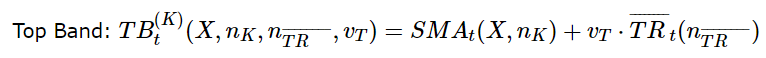

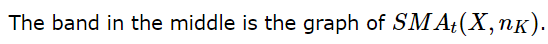

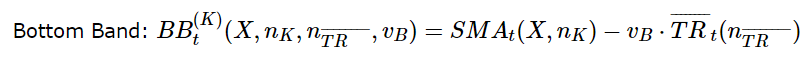

In [33]:
import talib

In [34]:
def Keltner_Channel(X,nK,nTR,vT,vB):
    '''
    X为开高低收数据，可以是heikin ashi也可是常规的candles
    '''
    sma_X = talib.SMA(HA_Close_no,nK)
    ATR = talib.ATR(X.High,X.Low,X.Close,timeperiod = nTR)
    Top_Band = sma_X + vT * ATR
    Middle_Band = sma_X
    Bottom_Band = sma_X - vB * ATR   
    
    return {"Top_Band":Top_Band,"Middle_Band":Middle_Band,"Bottom_Band":Bottom_Band}

In [35]:
a = Keltner_Channel(table_5min,7,14,2,1.5)["Top_Band"]

In [36]:
b = Keltner_Channel(table_5min,7,14,2,1.5)["Middle_Band"]

In [37]:
c = Keltner_Channel(table_5min,7,14,2,1.5)["Bottom_Band"]

In [38]:
table_5min["Top_Band"] = a
table_5min["Middle_Band"] = b
table_5min["Bottom_Band"] = c

In [40]:
table_5min.to_csv("./code_generated_csv/table_5min.csv")